In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
from parsing import parser, digit
from plotting import plotter, voronoi
from analysis import training, sampling
from config import settings

In [73]:
n_observation_classes = 256
n_hidden_states = 30
n_iter = 1000
tol = 1.0

In [74]:
parse = parser.Parser();
train_digits = parse.parse_file('data/pendigits-train');
test_digits = parse.parse_file('data/pendigits-test')

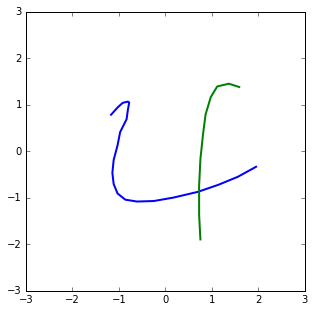

In [75]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(train_digits[6], True)

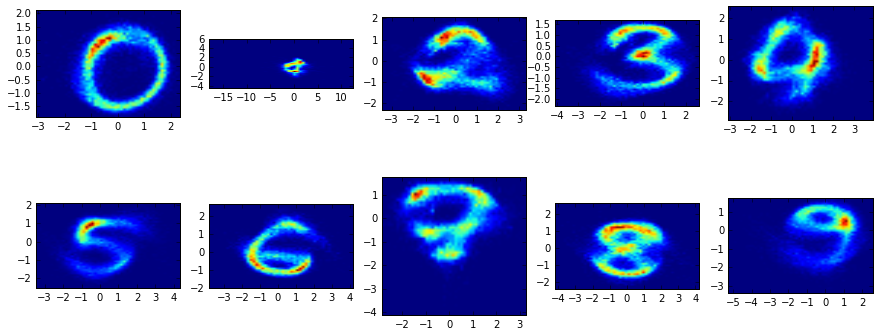

In [76]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digits_heatmap(train_digits, True);

In [77]:
centroids = training.get_digit_kmeans_centroids(train_digits, n_observation_classes - 3)

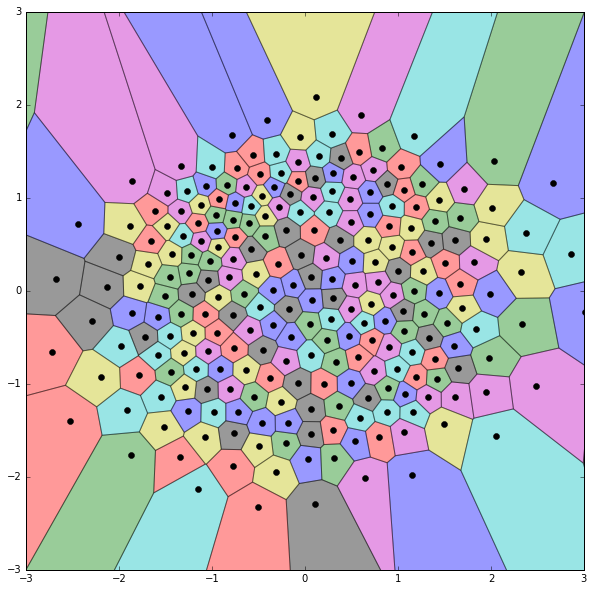

In [78]:
pylab.rcParams['figure.figsize'] = (10, 10);
voronoi.plot_centroids(centroids);

In [79]:
training.set_digit_observations(train_digits, centroids, n_observation_classes)

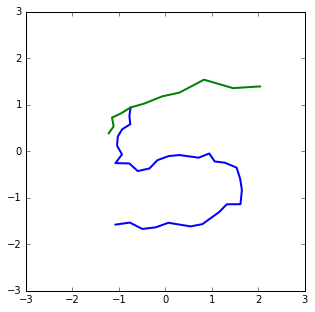

In [80]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit_observations(train_digits[8], centroids, n_observation_classes, True)

In [81]:
hidden_markov_models = training.train_hmm(train_digits, n_observation_classes, n_hidden_states, n_iter, tol)

In [101]:
samplings = sampling.get_samplings(hidden_markov_models, n_observation_classes, centroids, 100)

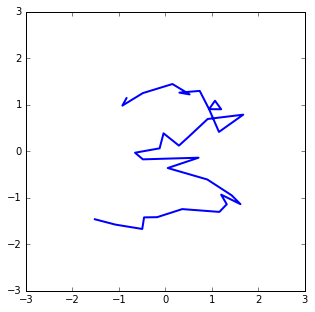

In [102]:
pylab.rcParams['figure.figsize'] = (5, 5);
plotter.plot_digit(samplings[2][5], True)

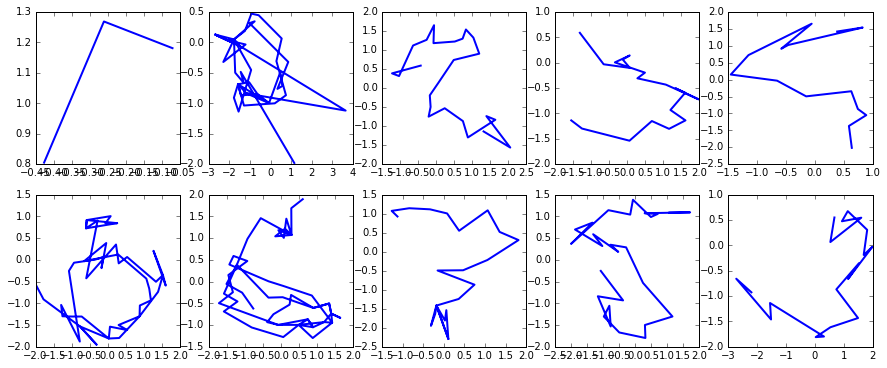

In [103]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digit_samples(samplings)

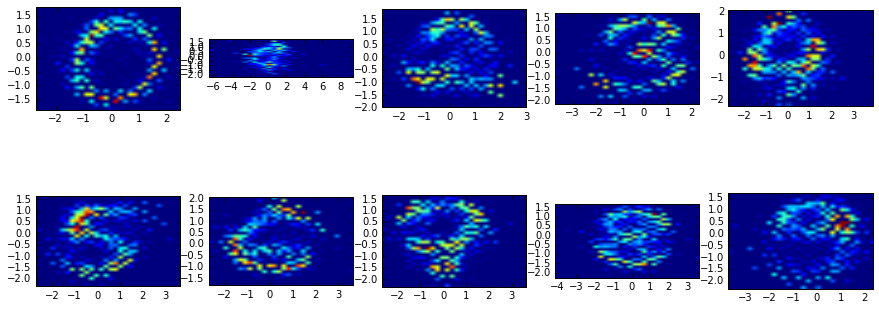

In [110]:
pylab.rcParams['figure.figsize'] = (15, 6);
plotter.plot_digit_samples_heatmap(samplings)